## **TITANIC SURVIVAL PREDICTION**

####**Objective**

The primary goal of this project is to design a robust
machine learning model to predict the survival outcomes of passengers aboard the Titanic. Leveraging the Titanic dataset, the model will analyze various demographic and travel-related attributes to determine the likelihood of survival.

 The model uses features such as Pclass, sex, age, ticket, fare and other relevant attributes to classify passengers into two categories: survived(1) and not survived(0).

This project aims to:
*   Understand and preprocess the Titanic dataset, including handling missing values, encoding categorical variables, and feature scaling.
*   Analyze key factors influencing survival, such as socio-economic status, age, sex and travel class.
*   Build and evaluate classification model to accurately predict survival.





In [51]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Exploratory Data Analysis**

In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#checking the null values
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
#handling the null values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
#dropping the Cabin column as there is more than 50% null values
df = df.drop(columns = 'Cabin', axis = 1)

In [ ]:
#checking if the missing values have been handled
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#checking the duplicate value
df.duplicated().sum()

0

There are no duplicates present in the dataset.

#### **Data Visualization**

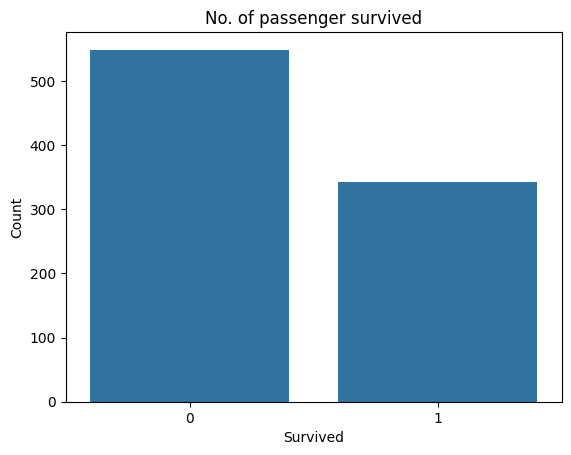

,count
Survived,
0,549
1,342


In [ ]:
#count plot of No.of passengers survived and not survived
sns.countplot(x = 'Survived', data = df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title("No. of passenger survived")
plt.show()

#checking the survival counts
df['Survived'].value_counts()

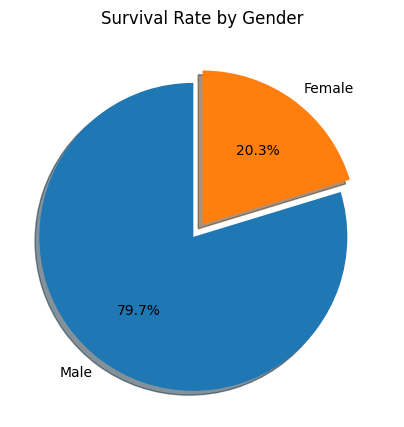

In [ ]:
#survival rate by gender
gender_survival_count=df.groupby('Sex')['Survived'].sum()
gender_counts=df['Sex'].value_counts()
survival_rate_by_gender=(gender_survival_count/gender_counts)*100

Labels = ['Male', 'Female']

plt.figure(figsize=(5,5))
plt.pie(survival_rate_by_gender, labels=Labels, autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)
plt.title("Survival Rate by Gender")
plt.show()

**Insight**

Women had a significantly higher survival rate compared to men. This aligns with the historical account that women and children were prioritized during evacuation.

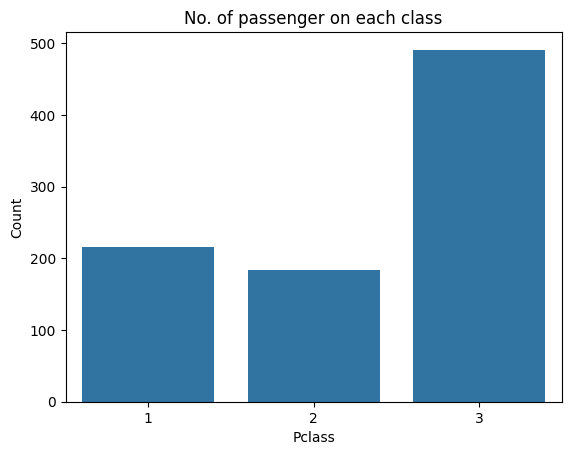

,count
Pclass,
3,491
1,216
2,184


In [ ]:
#No. of passenger on each class
sns.countplot(x = 'Pclass', data = df)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title("No. of passenger on each class")
plt.show()

#checking the survival counts
df['Pclass'].value_counts()

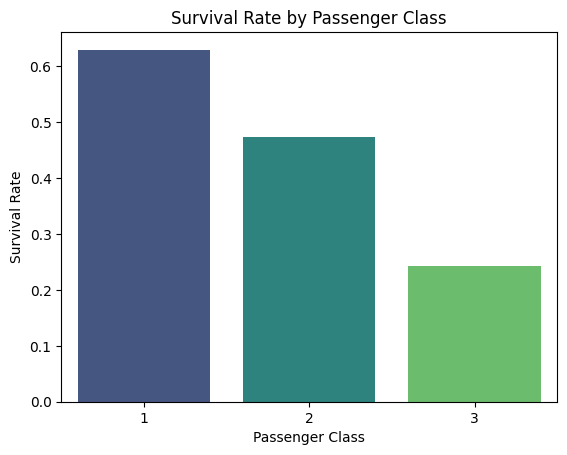

In [ ]:
#survival rate by class
survival_by_class=df.groupby('Pclass')['Survived'].mean()

sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='viridis')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

**Insight**

Passengers in higher classes had a better chance of survival. This might reflect better access to lifeboats or priority given to first class passengers.

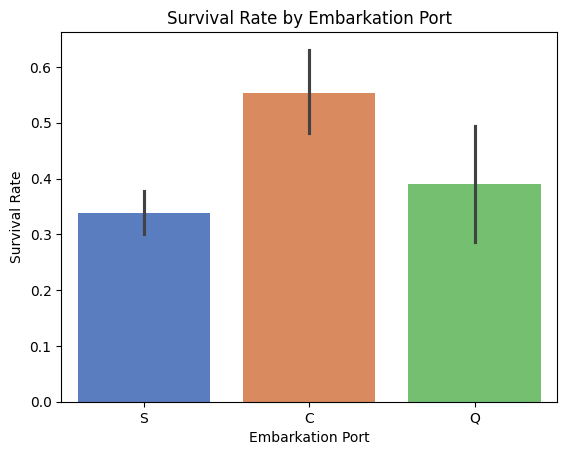

In [ ]:
#survival by embarkation port
sns.barplot(x = 'Embarked', y='Survived', data = df, palette='muted')
plt.title("Survival Rate by Embarkation Port")
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

**Insight**

Passengers embarking from Cherbourg(C) had the highest survival rate(55%), while those from Southampton(S) had the lowest(33%). Embarkation port may be an indirect indicator of passenger class and access to resources.

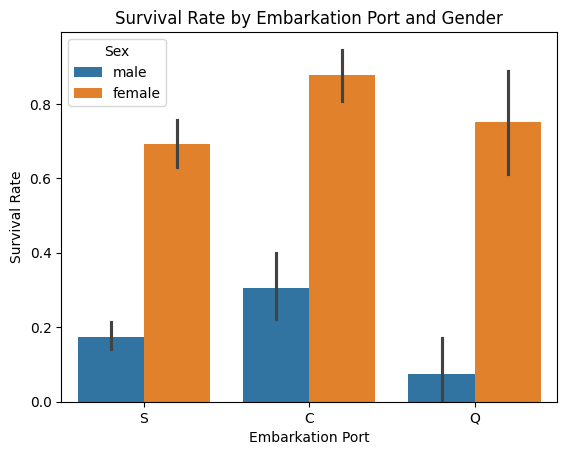

In [ ]:
#survival rate by embarkation port and gender
sns.barplot(x = 'Embarked', y = 'Survived', hue='Sex', data=df)
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.title("Survival Rate by Embarkation Port and Gender")
plt.show()

**Insight**

Females embarking from Cherbourg had the highest survival rate.

Males from Southampton had the lowest survival rate.

Embarkation port reflects socio-economic factors, as Cherbourg passengers were more likely to be in higher classes.

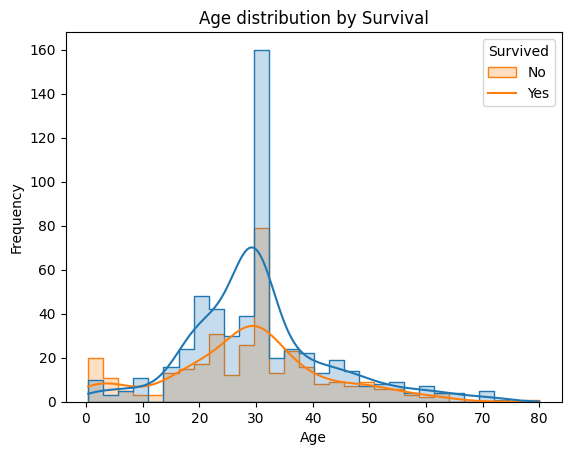

In [ ]:
#age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element='step')
plt.title('Age distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

**Insight**

Survivors are spread across all ages. Younger passengers, especially children, were more likely to survive, indicating prioritization during evacuation.


#### **Feature Engineering**

In [ ]:
#dropping the unnecessary column 'Name' and 'Ticket'
df = df.drop(columns = ['Name','Ticket'], axis = 1)

In [ ]:
#converting 'Sex' and 'Embarked' columns to categorical datatype
df['Sex'] = df.Sex.astype('category')
df['Embarked'] = df.Embarked.astype('category')

In [ ]:
#changing the datatype of 'Age' and 'Fare' from float to int
df['Sex'] = df.Sex.cat.codes
df['Embarked'] = df.Embarked.cat.codes

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [ ]:
df.groupby('Pclass').mean()['Survived']*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [ ]:
df.groupby('Embarked').mean()['Survived']*100

,Survived
Embarked,
0,55.357143
1,38.961039
2,33.900929


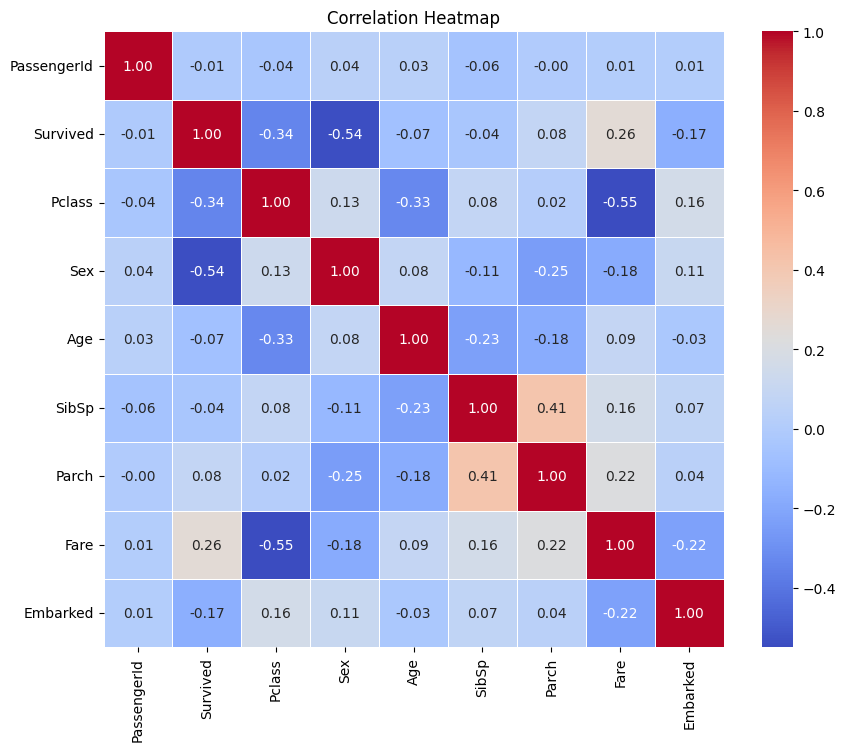

In [ ]:
#visualizing the correlated columns
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Insight**

*   Sex is a critical factor in survival, with females having a much higher survival rate.
*   Pclass and Fare are moderately important predictors of survival.
*   Family related variables(Parch and SibSp) are positively correlated, reflecting common family travel dynamics.
*   Embarkation point (Embarked) has only a minor influence on survival.






#### **Model Selection**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#assigning columns to X for train_test_split
X = df.drop(columns = ['Survived', 'PassengerId'], axis = 1)

In [ ]:
y = df['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

####**Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_pred = logreg.predict(X_train)

In [ ]:
#training accuracy
train_accuracy = accuracy_score(y_train, X_pred)
print('Accuracy score of training data :', train_accuracy)

Accuracy score of training data : 0.8132022471910112


In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
#testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of test data :', test_accuracy)

Accuracy score of test data : 0.7877094972067039


####**Conclusion**

This Titanic Survival Prediction project successfully demonstrates the application of machine learning techniques to a real-world dataset, providing valuable insights into survival factors during the Titanic disaster.

Through exploratory data analysis, we identified key survival trends:
*   Women and children had significantly higher survival rates, reflecting historical accounts of evacuation priorities.
*   Socio-economic status, represented by passenger class, played a critical role, with first-class passengers having a higher likelihood of survival.
*   Age emerged as another significant factor, with younger passengers more likely to survive.

We successfully built a classification model that achieved reasonable accuracy and provided insights into the socio-economic and demographic factors affecting survival during Titanic.




